In [2]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

%matplotlib inline

<h2>Preprocessing and scaling</h2>

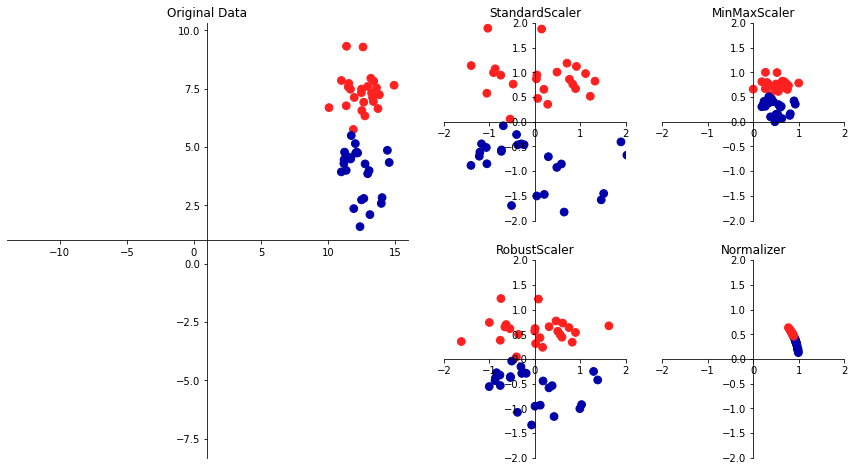

In [3]:
mglearn.plots.plot_scaling()

StandardScaler - average = 0, variance = 1<br/>RobustScaler - median = 0, quartile = 1 //ignores remote data(measurement errors)<br/>MinMaxScaler - Data features between 0 and 1<br/>Normalizer - Feature vector has an euclidean length of 1. Each data point is scalerd by another number(reverse of its length). Used when the direction of data is needed over its feature vector's length.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
np.set_printoptions(precision=3, suppress=True)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [6]:
X_train_scaled = scaler.transform(X_train)
print(f"Shape after transform: {X_train_scaled.shape}")
print(f"Minimum for each feature before scaling:\n{X_train.min(axis=0)}")
print(f"Maximum for each feature before scaling:\n{X_train.max(axis=0)}")
print(f"Minimum for each feature after scaling:\n{X_train_scaled.min(axis=0)}")
print(f"Maximum for each feature after scaling:\n{X_train_scaled.max(axis=0)}")

Shape after transform: (426, 30)
Minimum for each feature before scaling:
[  7.691   9.71   47.92  170.4     0.053   0.019   0.      0.      0.117
   0.05    0.112   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.008   0.001   8.678  12.02   54.49  223.6     0.071   0.027   0.
   0.      0.157   0.055]
Maximum for each feature before scaling:
[  28.11    39.28   188.5   2501.       0.163    0.311    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.218    0.938    0.961    0.291    0.664    0.173]
Minimum for each feature after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
X_test_scaled = scaler.transform(X_test)
print(f"Shape after transform: {X_test_scaled.shape}")
print(f"Per-feature minimum after scaling:\n{X_test_scaled.min(axis=0)}")
print(f"Per-feature maximum after scaling:\n{X_test_scaled.max(axis=0)}")

Shape after transform: (143, 30)
Per-feature minimum after scaling:
[-0.035  0.023 -0.029 -0.012  0.119  0.055  0.     0.    -0.057  0.057
  0.002  0.001  0.001  0.004  0.049  0.026  0.     0.     0.031  0.011
 -0.027  0.013 -0.021 -0.01   0.114  0.03   0.     0.     0.     0.034]
Per-feature maximum after scaling:
[0.858 0.724 0.879 0.733 0.763 1.116 0.88  0.917 0.928 0.684 0.427 0.781
 0.418 0.36  0.487 0.782 0.767 0.629 1.326 0.759 0.87  0.937 0.811 0.796
 1.029 1.132 1.303 0.998 0.764 1.292]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

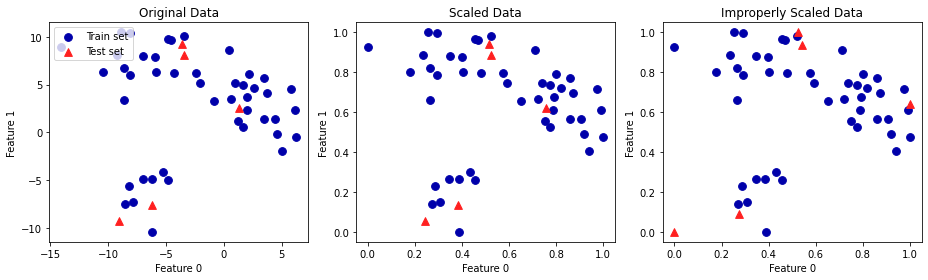

In [8]:
from cProfile import label
from sklearn.datasets import make_blobs
#synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=42, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=42, test_size=.1)

#put train and test set of a plot
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Train set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

#scale data with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#visualize properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Train set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

#scale test set independently, so test set minimum and maximum are 0 and 1
#JUST FOR ILLUSTRATIVE PURPOSES
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

#visualize improperly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Train set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

<h4>Shortcuts and alternatives</h4>

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_scaled_d = scaler.fit_transform(X) #This method is more efficient for some models and it's good practice to use it while transforming train sets

<h4>Preprocessing influence on Supervised learning</h4>

In [10]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print(f"Test set accuracy: {100*svm.score(X_test, y_test):.2f}%")

Test set accuracy: 94.41%


In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print(f"Scaled test set accuracy: {100*svm.score(X_test_scaled, y_test):.2f}%")

Scaled test set accuracy: 96.50%


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print(f"SVM accuracy in test set: {100*svm.score(X_test_scaled, y_test):.2f}%")

SVM accuracy in test set: 95.80%


<h2>Dimensionality reduction, feature extraction and manifold learning</h2>

<h4>Principal Component Analysis</h4>

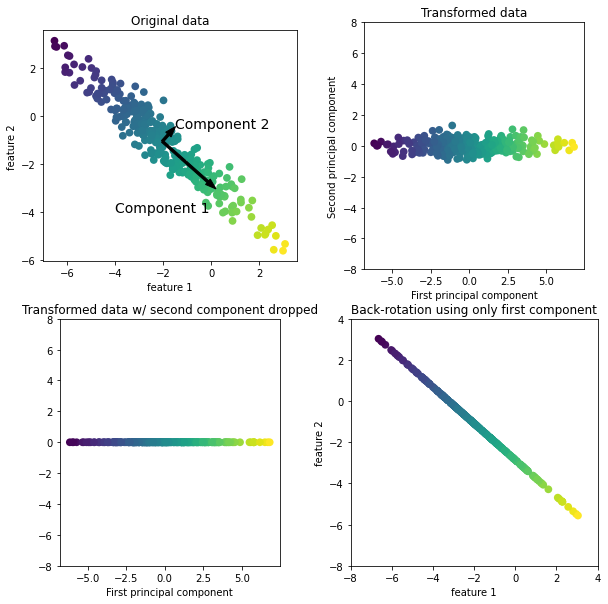

In [13]:
mglearn.plots.plot_pca_illustration()

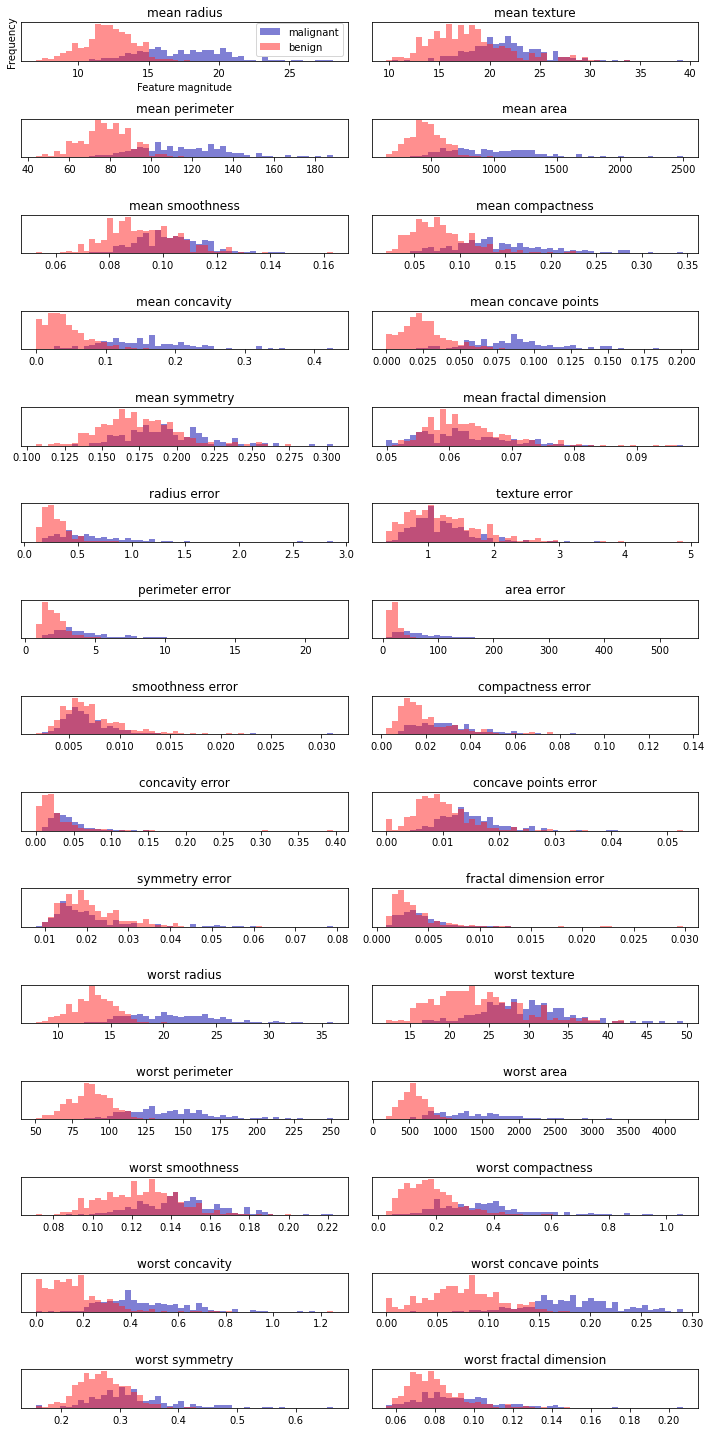

In [14]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel() #returns a contiguous flattened array

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(1), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

In [15]:
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #Only first two principal components of the data
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(f'Original shape: {str(X_scaled.shape)}')
print(f'Reduced shape: {str(X_pca.shape)}')

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principle component')

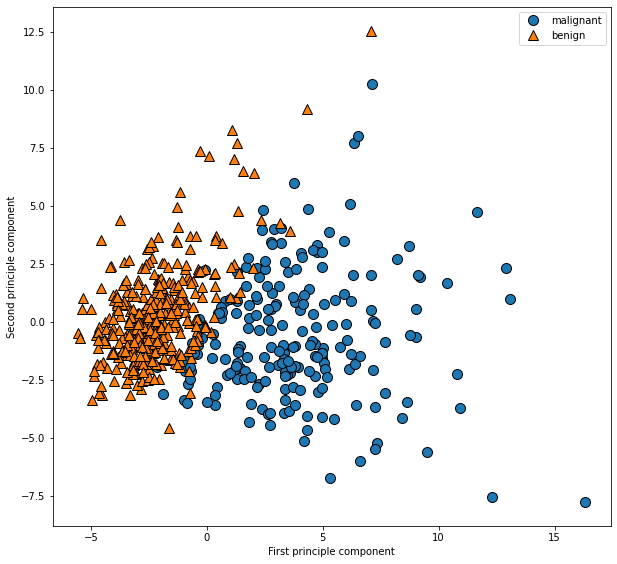

In [17]:
plt.figure(figsize=(10,10))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [18]:
print(f'PCA component shape: {pca.components_.shape}')

PCA component shape: (2, 30)


In [19]:
print(f'PCA components: \n{pca.components_}')

PCA components: 
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0, 0.5, 'Main components')

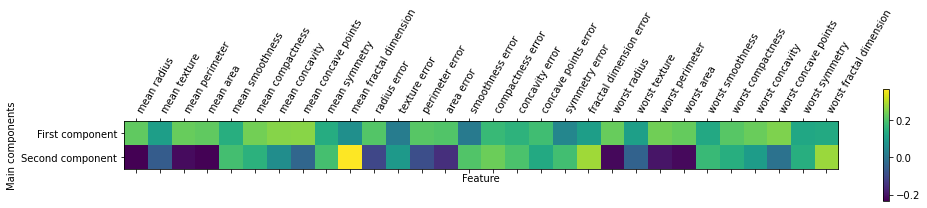

In [20]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Main components')

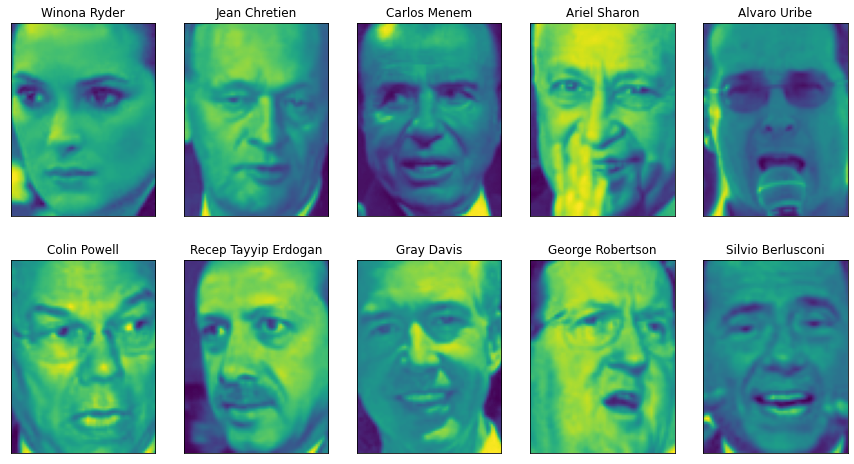

In [21]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [22]:
print(f'people.images.shape: {people.images.shape}')
print(f'Class amount: {len(people.target_names)}')

people.images.shape: (3023, 87, 65)
Class amount: 62


In [23]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f'{name:25}  {count:3}', end=' ')
    if (i+1) % 3 == 0:
        print()

Alejandro Toledo            39 Alvaro Uribe                35 Amelie Mauresmo             21 
Andre Agassi                36 Angelina Jolie              20 Ariel Sharon                77 
Arnold Schwarzenegger       42 Atal Bihari Vajpayee        24 Bill Clinton                29 
Carlos Menem                21 Colin Powell               236 David Beckham               31 
Donald Rumsfeld            121 George Robertson            22 George W Bush              530 
Gerhard Schroeder          109 Gloria Macapagal Arroyo     44 Gray Davis                  26 
Guillermo Coria             30 Hamid Karzai                22 Hans Blix                   39 
Hugo Chavez                 71 Igor Ivanov                 20 Jack Straw                  28 
Jacques Chirac              52 Jean Chretien               55 Jennifer Aniston            21 
Jennifer Capriati           42 Jennifer Lopez              21 Jeremy Greenstock           24 
Jiang Zemin                 20 John Ashcroft               5

In [24]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255 #Scale to 0-1 range

C:\Users\John\AppData\Local\Temp\ipykernel_3820\995535854.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f'Test set accuracy using 1 nearest neighbour: {100 * knn.score(X_test, y_test):.2f}%')

Test set accuracy using 1 nearest neighbour: 25.39%


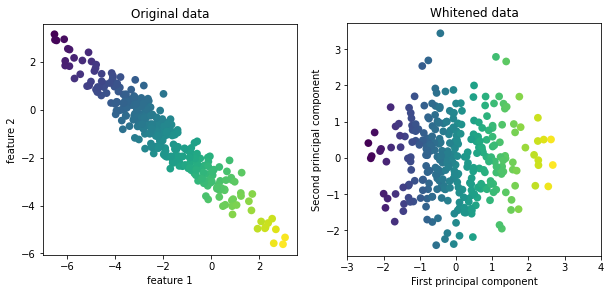

In [26]:
mglearn.plots.plot_pca_whitening()

In [27]:
pca = PCA(n_components=100, whiten=True, random_state=42).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"X_train_pca.shape: {X_train_pca.shape}")

X_train_pca.shape: (1547, 100)


In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(f'Test set accuracy: {100 * knn.score(X_test_pca, y_test):.2f}%')

Test set accuracy: 32.75%


In [29]:
print(f'pca_components_.shape: {pca.components_.shape}')

pca_components_.shape: (100, 5655)


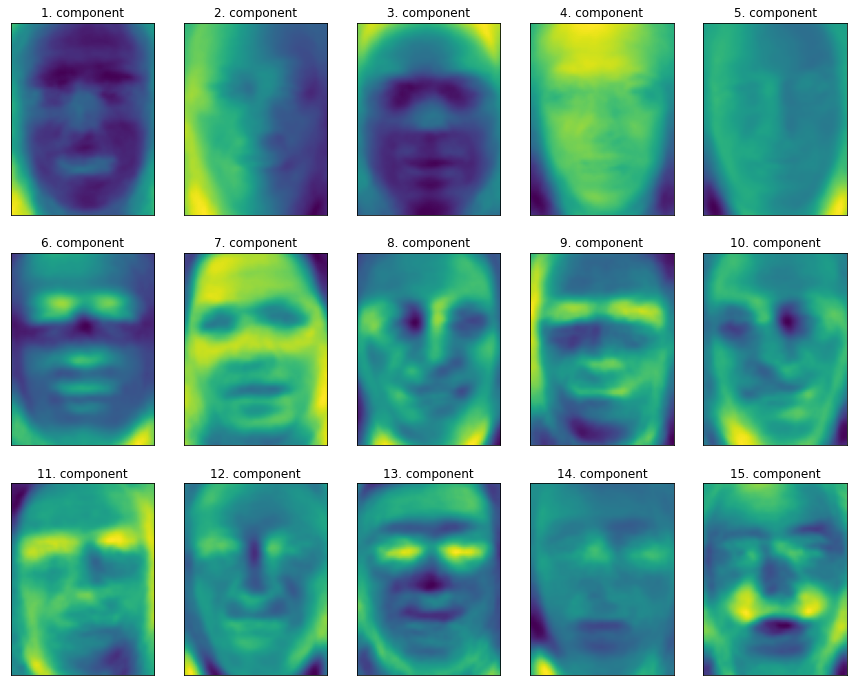

In [30]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title(f'{(i + 1)}. component')

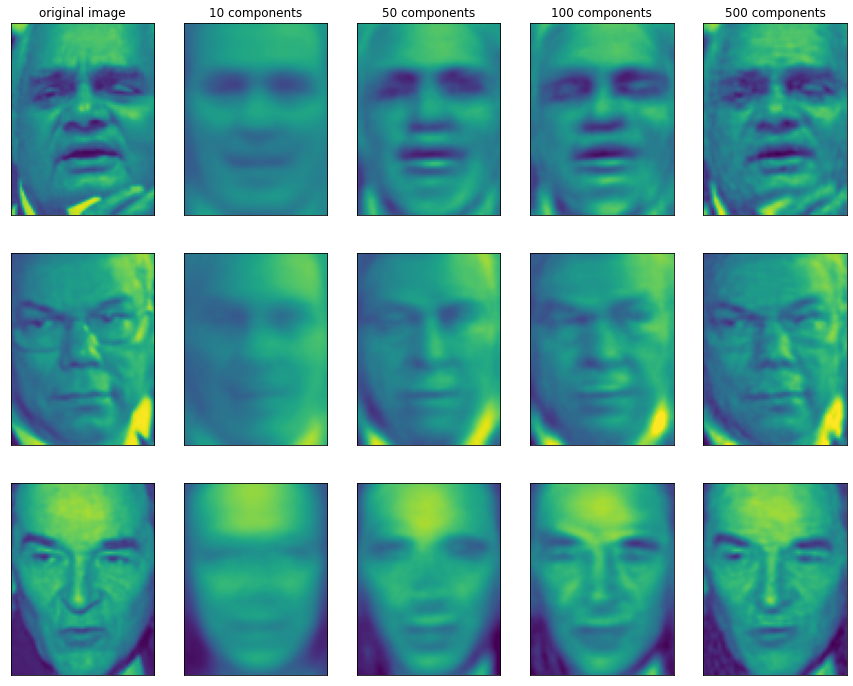

In [31]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal component')

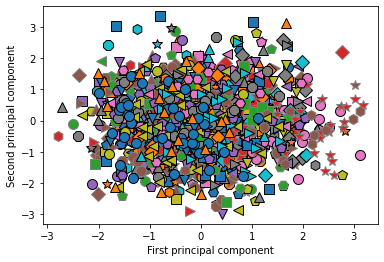

In [32]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

<h2>Non-negative Matrix factorization (NMF)</h2>

<h4>NMF on synthetic data</h4>

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


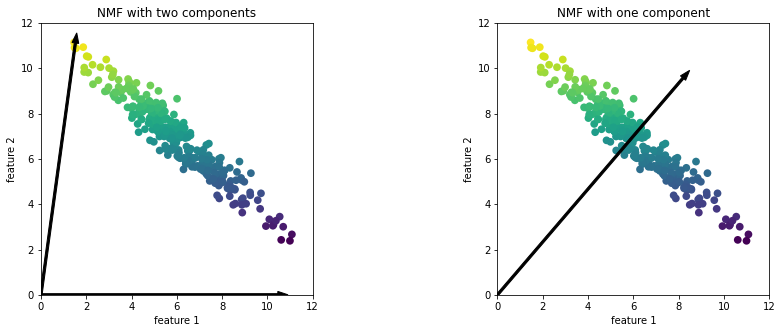

In [33]:
mglearn.plots.plot_nmf_illustration()

<h4>NMF on face pictures</h4>

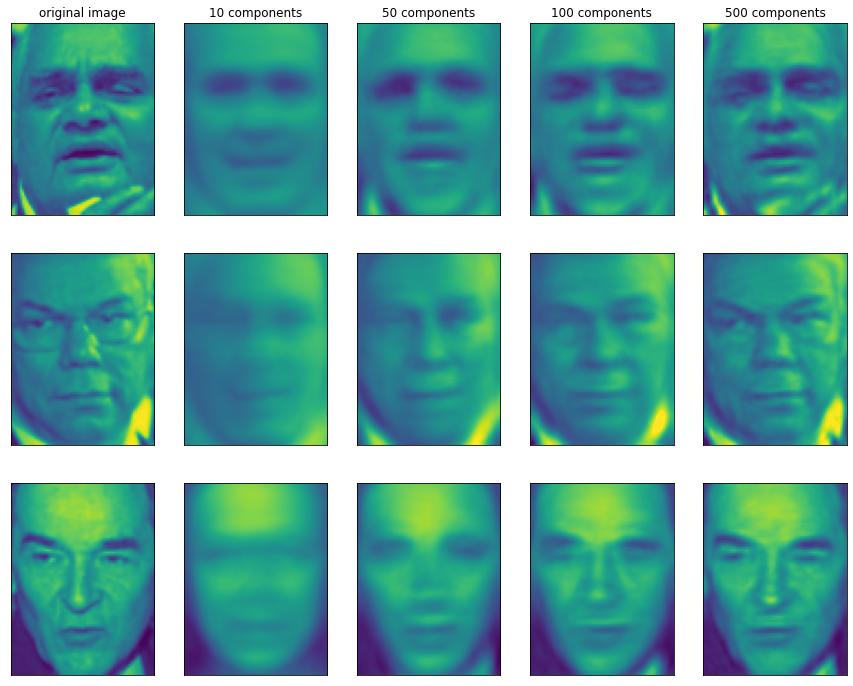

In [34]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


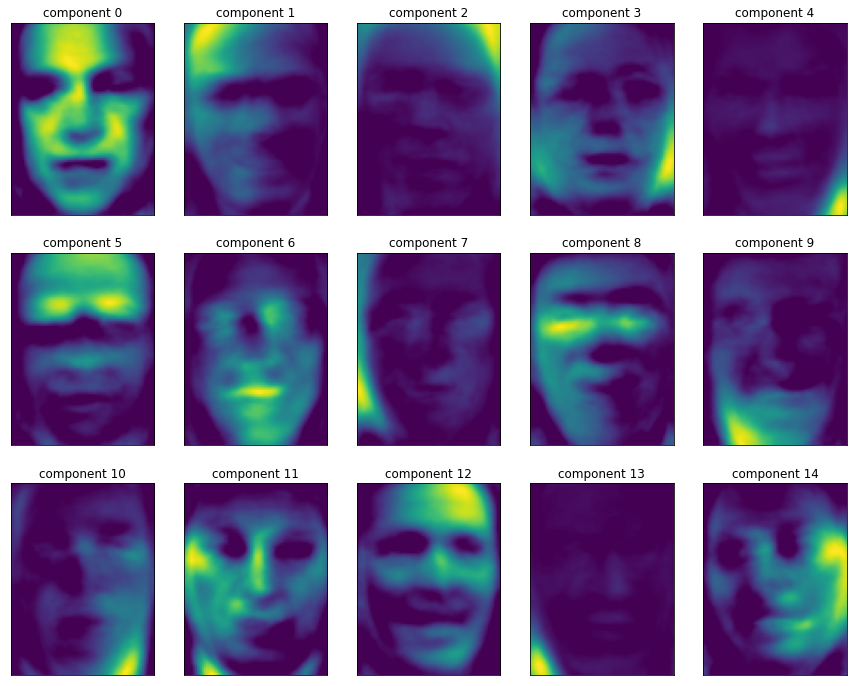

In [35]:
#Extracting 15 components

from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=42)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fig, axes = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title(f'component {i}')

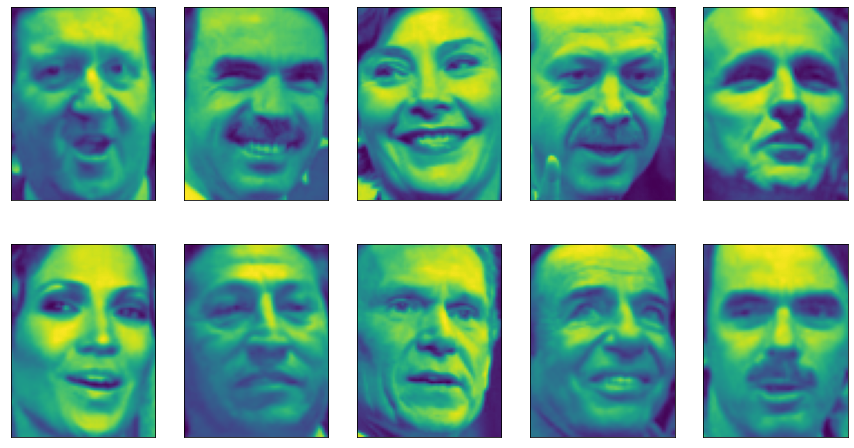

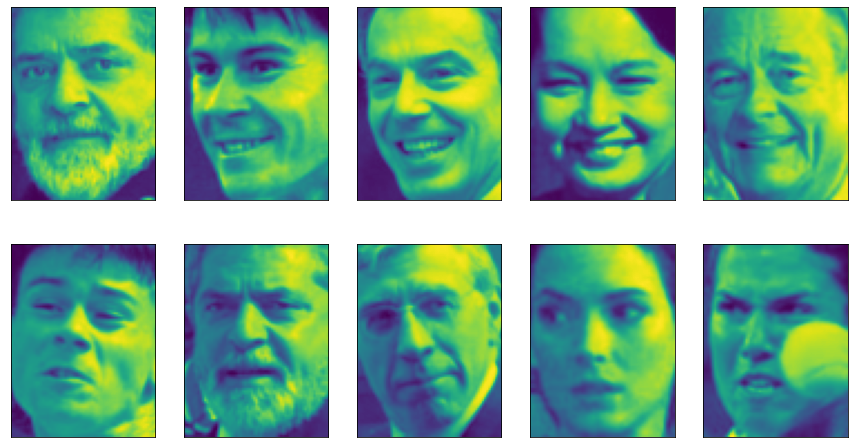

In [36]:
#10 images for comp 12
compn = 12

inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

#10 images for comp 14
compn = 14

inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

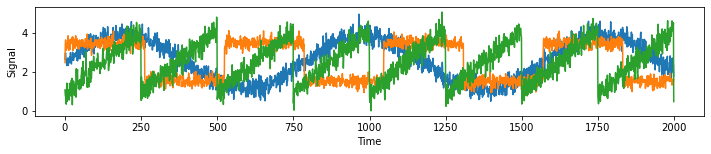

In [37]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(12, 2))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [38]:
#mix data to 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print(f'Measurements shape: {X.shape}')

Measurements shape: (2000, 100)


In [39]:
#recover 3 signals using NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print(f'NMF Recovered signal shape: {S_.shape}')

NMF Recovered signal shape: (2000, 3)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [40]:
#recover 3 signals using NMF
pca = PCA(n_components=3)
H = pca.fit_transform(X)
print(f'PCA Recovered signal shape: {H.shape}')

PCA Recovered signal shape: (2000, 3)


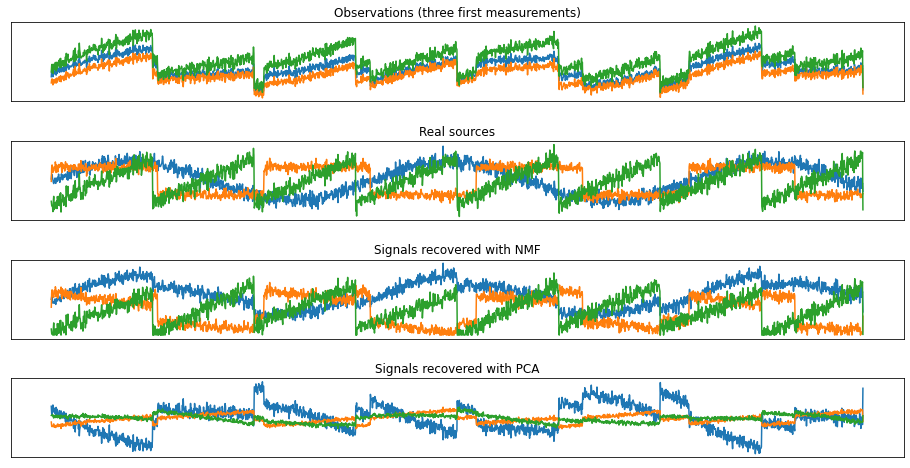

In [41]:
models = [X, S, S_, H]
names = ['Observations (three first measurements)',
         'Real sources',
         'Signals recovered with NMF',
         'Signals recovered with PCA']
fig, axes = plt.subplots(4, figsize=(16,8), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

<h4>Manifold learning with t-SNE</h4>

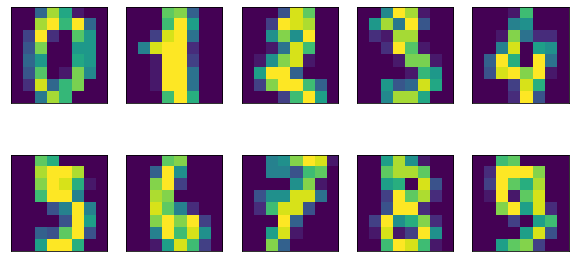

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

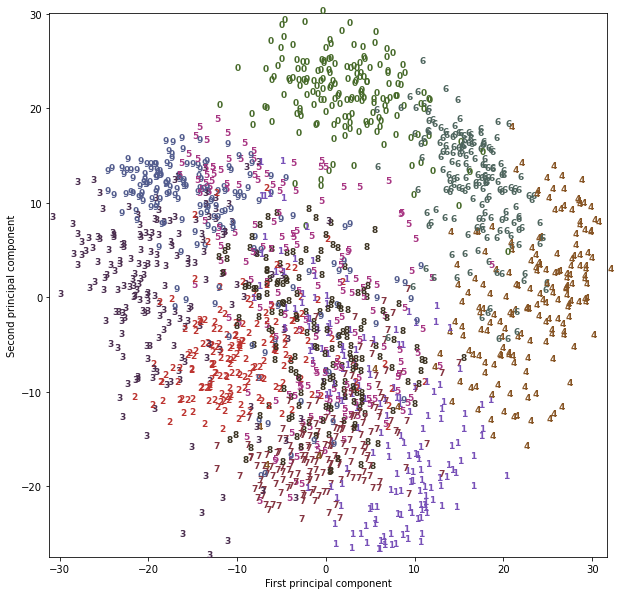

In [43]:
#Build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)

#Transform digit data into two principal components
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [44]:
#build a t-SNE model
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 't-SNE feature 1')

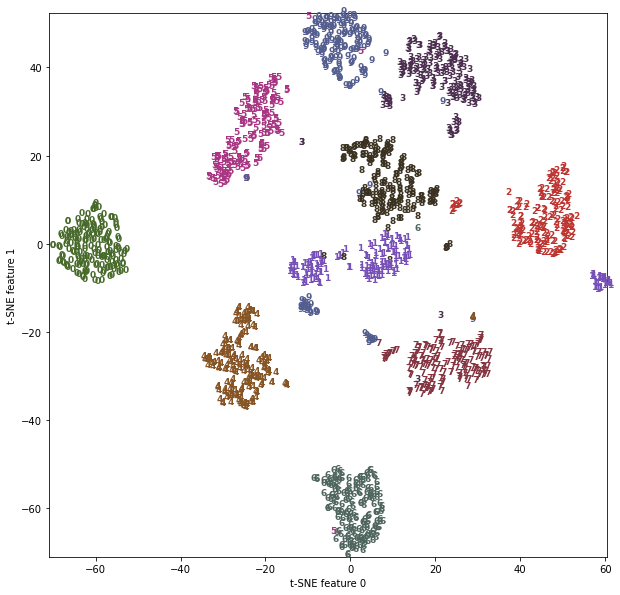

In [45]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')

<h2>Grouping</h2>

<h4>k-average Grouping</h4>

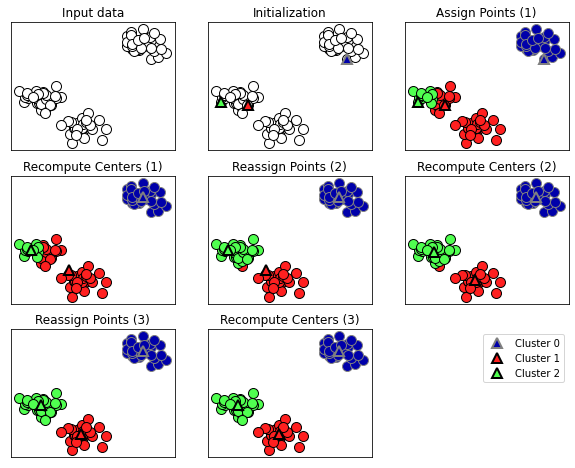

In [46]:
mglearn.plots.plot_kmeans_algorithm()

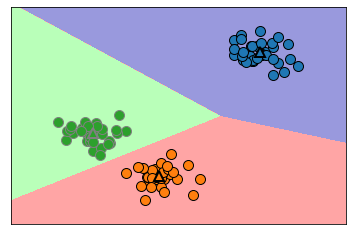

In [47]:
mglearn.plots.plot_kmeans_boundaries()

In [48]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#generate synthetic 2D data
X, y = make_blobs(random_state=42)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [49]:
print(f'Cluster alignment: \n{kmeans.labels_}')

Cluster alignment: 
[1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]


In [50]:
print(f'Label prediction: \n{kmeans.predict(X)}')
#Output will be the same as above, existing model will not be modified

Label prediction: 
[1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]


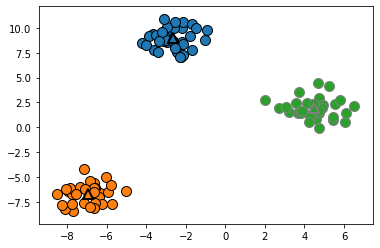

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2
)

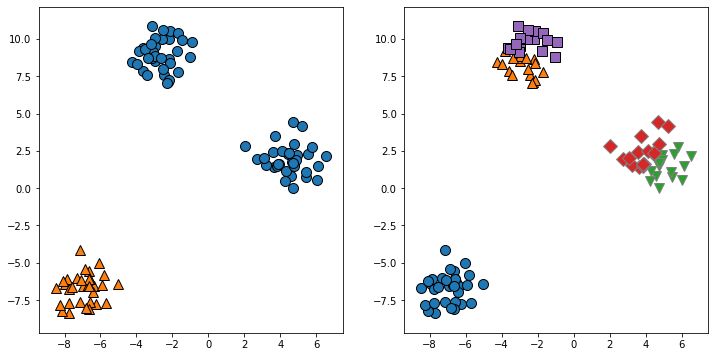

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#two cluster centers
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

#five cluster centers
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

<h4>k-average Grouping errors</h4>

Text(0, 0.5, 'feature 1')

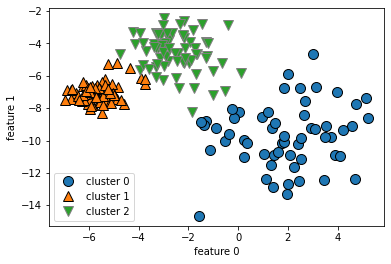

In [53]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=1717)
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc='best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'Feature 1')

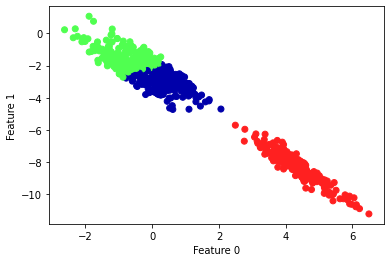

In [54]:
#generate random cluster data
X, y = make_blobs(random_state=1717, n_samples=600)
rng = np.random.RandomState(74)

#transform data to be stretched
transform = rng.normal(size=(2, 2))
X = np.dot(X, transform)

#group data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#plot cluster assignments and centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3) #cmap - colormap
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

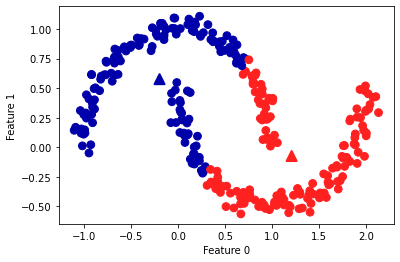

In [55]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

#group data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#plot cluster assignments and centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap = mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

<h4>Vector quantization or seeing k-average grouping as decomposition</h4>

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=42)

nmf = NMF(n_components=100, random_state=42)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=42)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=42)
kmeans.fit(X_train)

X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF')

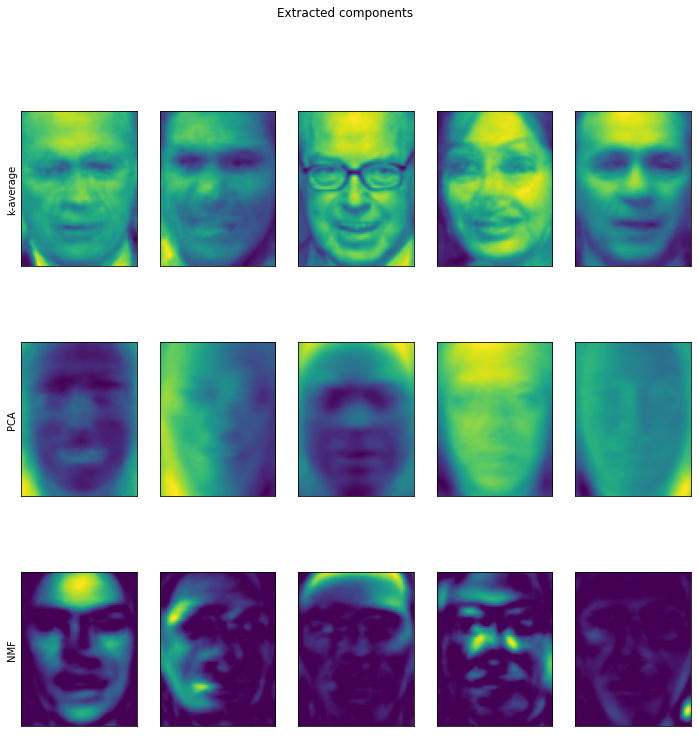

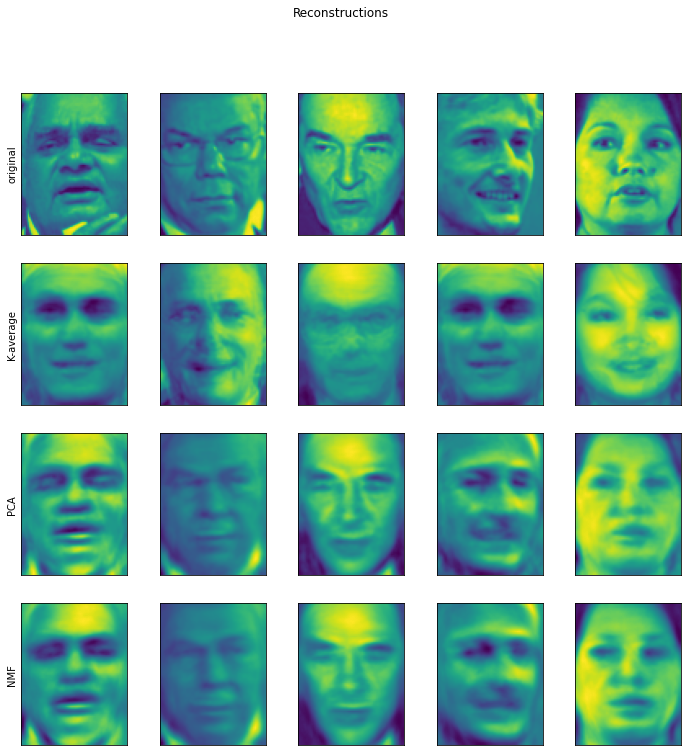

In [57]:
fig, axes = plt.subplots(3, 5, figsize=(12, 12), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('Extracted components')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel('k-average')
axes[1, 0].set_ylabel('PCA')
axes[2, 0].set_ylabel('NMF')

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 12))
fig.suptitle('Reconstructions')
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0, 0].set_ylabel('original')
axes[1, 0].set_ylabel('K-average')
axes[2, 0].set_ylabel('PCA')
axes[3, 0].set_ylabel('NMF')

Cluster alignment:
[5 9 3 4 0 7 1 2 2 6 1 2 2 5 8 2 6 4 5 1 0 9 4 5 1 1 5 1 0 0 9 3 6 1 4 7 0
 0 2 1 5 8 6 3 0 8 3 3 4 5 7 2 9 0 7 1 0 5 2 5 2 5 3 9 3 7 6 8 5 0 6 0 2 6
 7 7 3 0 6 7 9 1 6 8 8 5 4 3 8 1 3 0 7 3 9 8 4 9 3 7 9 3 0 4 7 4 9 1 7 4 2
 9 8 4 1 0 1 6 4 3 6 7 4 4 3 3 8 4 5 6 2 6 5 4 6 0 9 7 6 0 2 2 8 6 5 3 9 7
 5 5 2 2 5 9 9 1 2 0 9 1 2 0 2 8 1 6 7 6 8 1 6 5 3 1 2 8 0 6 4 8 9 6 4 0 4
 7 5 7 5 1 0 8 3 8 1 7 9 5 2 7]


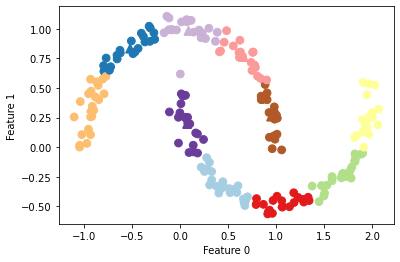

In [58]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
print(f'Cluster alignment:\n{y_pred}')

In [59]:
distance_features = kmeans.transform(X)
print(f'Distance feature shape: {distance_features.shape}')
print(f'Distance features:\n{distance_features}')

Distance feature shape: (200, 10)
Distance features:
[[1.541 0.883 2.717 ... 1.099 2.97  1.974]
 [0.895 1.472 1.033 ... 0.872 1.061 0.206]
 [1.087 1.139 1.448 ... 0.783 1.421 0.599]
 ...
 [1.664 0.819 2.818 ... 1.176 3.047 2.048]
 [1.382 2.52  0.201 ... 1.775 0.369 0.946]
 [0.89  0.654 1.796 ... 0.263 1.943 0.954]]


<h4>Agglomerative grouping</h4>

<h5>Three options:<br><i>ward - default, clusters with the lowest possible variance</i> <br><i>average - joins two clusters with the lowest average distance between all points</i> <br><i>complete - joins two clusters with the lowest average distance between their points</i></h5>

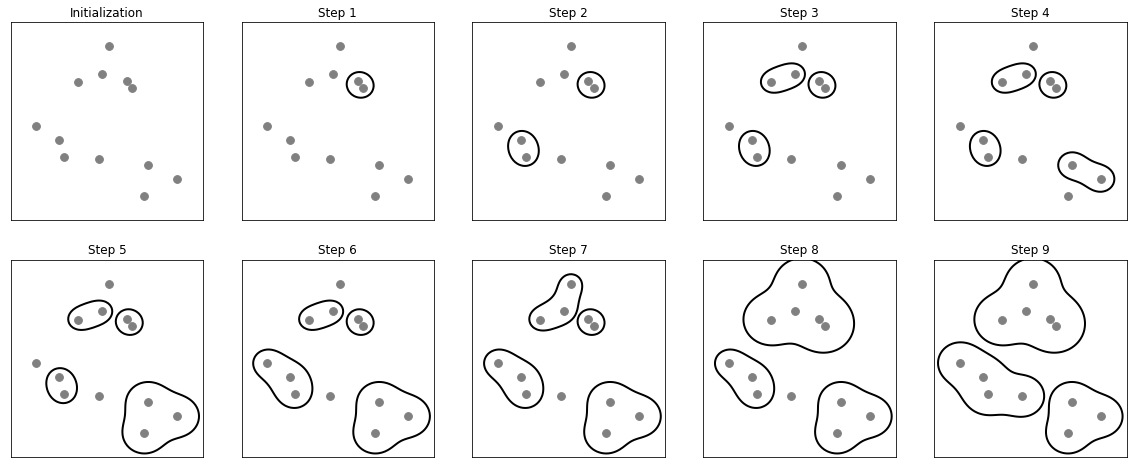

In [60]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

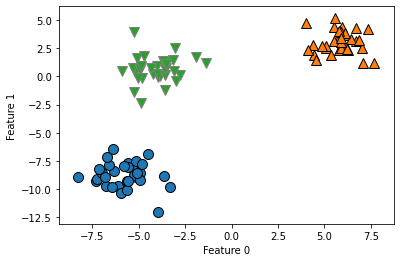

In [61]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=17)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

<h5>Hierarchical grouping and dendrograms</h5>

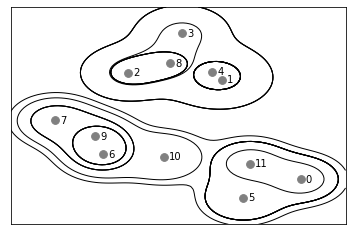

In [62]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Distance to cluster')

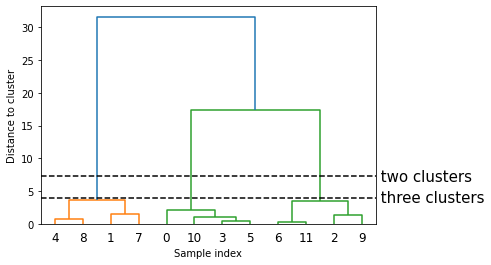

In [63]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=17, n_samples=12)

#SciPy will return an array of distances covered while creating clusters
linkage_array = ward(X)

#Plot the dendrogram for linkage array
dendrogram(linkage_array)

#Mark cuts on the tree signifying two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel('Sample index')
plt.ylabel('Distance to cluster')

<h4>DBSCAN</h4>

In [64]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=42, n_samples=16)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print(f'Cluster alignment:\n{clusters}')

Cluster alignment:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


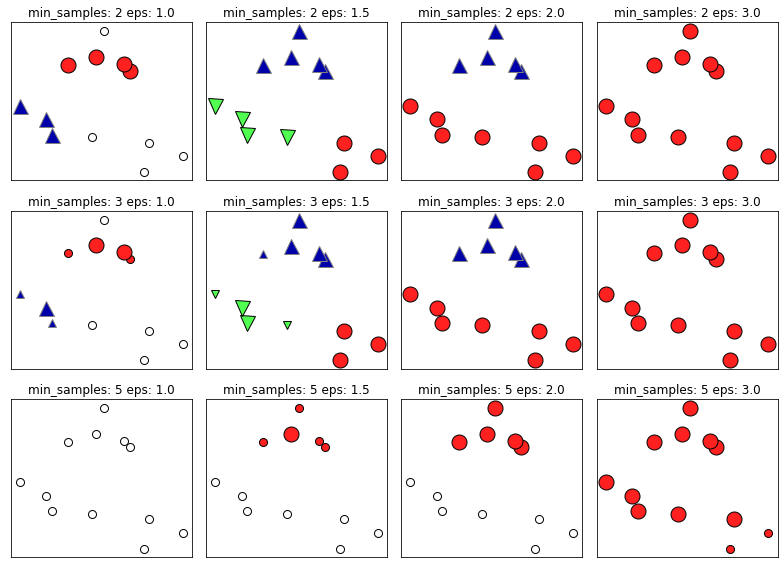

In [65]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

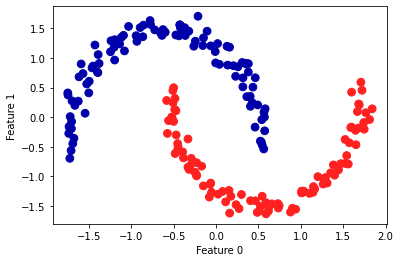

In [66]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=117)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

<h2>Comparison and evaluation of grouping algorithms</h2>

<h5>Evaluating with ground truth</h5>

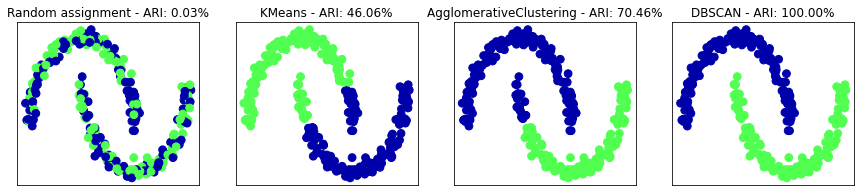

In [67]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=300, noise=0.05, random_state=117)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt. subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

#Random cluster assignment for comparison
random_state = np.random.RandomState(seed=42)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

#Plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title(f'Random assignment - ARI: {100*adjusted_rand_score(y, random_clusters):.2f}%') #Adjusted Rand Index (ARI)
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title(f'{algorithm.__class__.__name__} - ARI: {100*adjusted_rand_score(y, clusters):.2f}%')

In [68]:
from sklearn.metrics import accuracy_score
#two clusters of same grouping
cluster1 = [0, 0, 1, 1, 0]
cluster2 = [1, 1, 0, 0, 1]
#accuracy = 0, none of the labels are the same
print(f'Accuracy: {100*accuracy_score(cluster1, cluster2):.2f}%')
#ARI = 1, grouping is exactly the same
print(f'ARI: {100*adjusted_rand_score(cluster1, cluster2):.2f}%')

Accuracy: 0.00%
ARI: 100.00%


<h5>Evaluating without ground truth</h5>

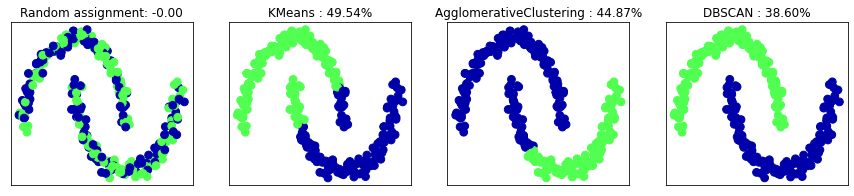

In [69]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
#Random cluster assignment
random_state = np.random.RandomState(seed=17)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
#Plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title(f'Random assignment: {silhouette_score(X_scaled, random_clusters):.2f}')
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title(f'{algorithm.__class__.__name__} : {100*silhouette_score(X_scaled, clusters):.2f}%')

<h4>Algorithm comparison on faces dataset</h4>

In [70]:
#Extract eigenfaces from the dataset and transform them ;; eigenface - set of eigenvectors used in face recognition. Derived from covariance matrix of probability distribution
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=17)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

<h5>DBSCAN</h5>

In [72]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print(f'Unique labels: {np.unique(labels)}')

Unique labels: [-1]


In [73]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print(f'Unique labels: {np.unique(labels)}')

Unique labels: [-1]


In [75]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print(f'Unique labels: {np.unique(labels)}')

Unique labels: [-1  0]


In [78]:
#count no. of points in each cluster and noise points.
print(f'No. of unique points per cluster: {np.bincount(labels + 1)}')

No. of unique points per cluster: [  29 2034]


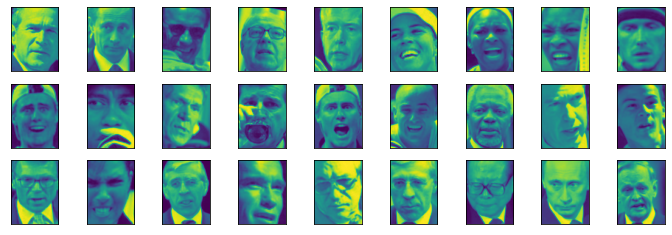

In [79]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [80]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print(f'\neps={eps}')
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print(f'Unique labels: {np.unique(labels)}')
    print(f'Cluster sizes: {np.bincount(labels + 1)}')


eps=1
Unique labels: [-1]
Cluster sizes: [2063]

eps=3
Unique labels: [-1]
Cluster sizes: [2063]

eps=5
Unique labels: [-1]
Cluster sizes: [2063]

eps=7
Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Cluster sizes: [2003    4   14    4    4    3    3    4    3    4    3    3    5    3
    3]

eps=9
Unique labels: [-1  0  1  2  3]
Cluster sizes: [1292  761    4    3    3]

eps=11
Unique labels: [-1  0]
Cluster sizes: [ 408 1655]

eps=13
Unique labels: [-1  0]
Cluster sizes: [ 121 1942]


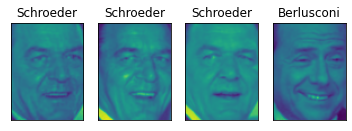

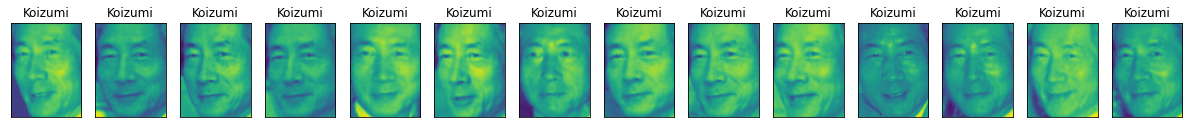

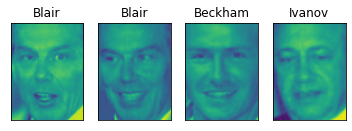

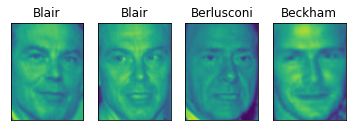

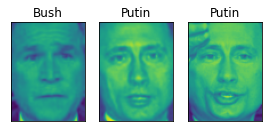

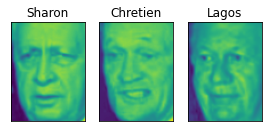

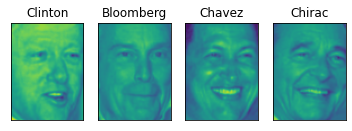

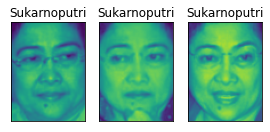

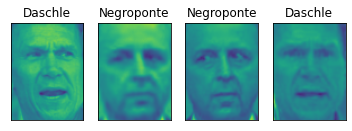

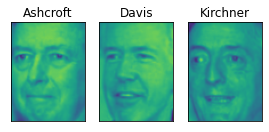

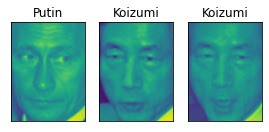

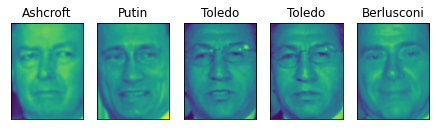

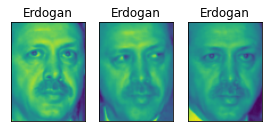

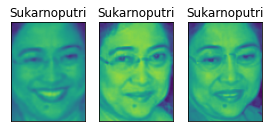

In [81]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

<h5>k-averages</h5>

In [82]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print(f'Cluster sizes for k-average grouping: {np.bincount(labels_km)}')

Cluster sizes for k-average grouping: [123 262 234  54 394 338  88 256 117 197]


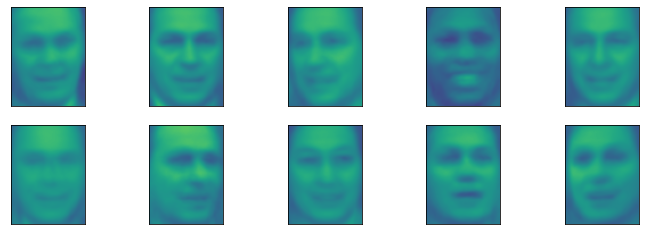

In [83]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

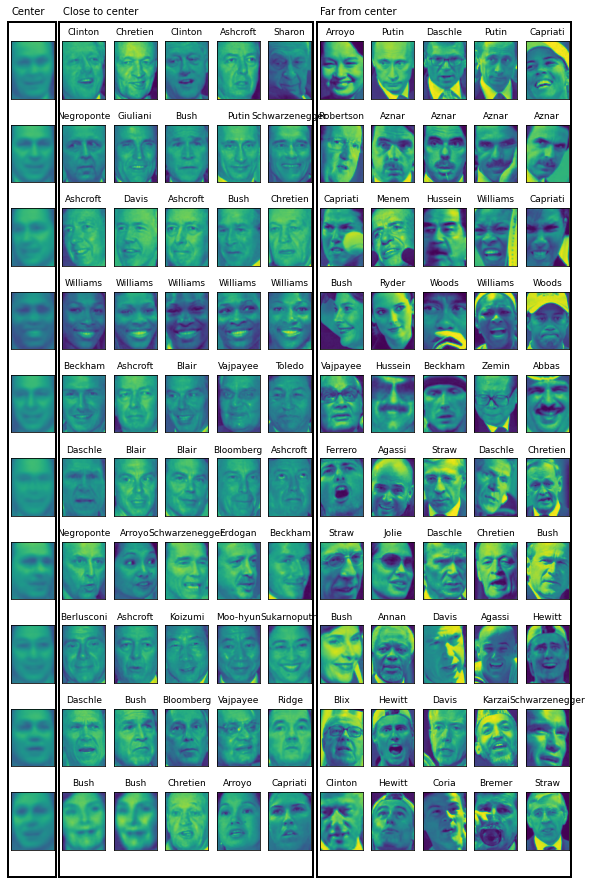

In [84]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

<h5>Agglomerative grouping</h5>

In [85]:
agglo = AgglomerativeClustering(n_clusters=10)
labels_agg = agglo.fit_predict(X_pca)
print(f'Cluster sizes for agglomerative grouping: {np.bincount(labels_agg)}')

Cluster sizes for agglomerative grouping: [562 215 626  93  54 142 144 119  67  41]


In [87]:
print(f'ARI: {adjusted_rand_score(labels_agg, labels_km)*100:.2f}%')

ARI: 13.05%


Text(0, 0.5, 'Distance to cluster')

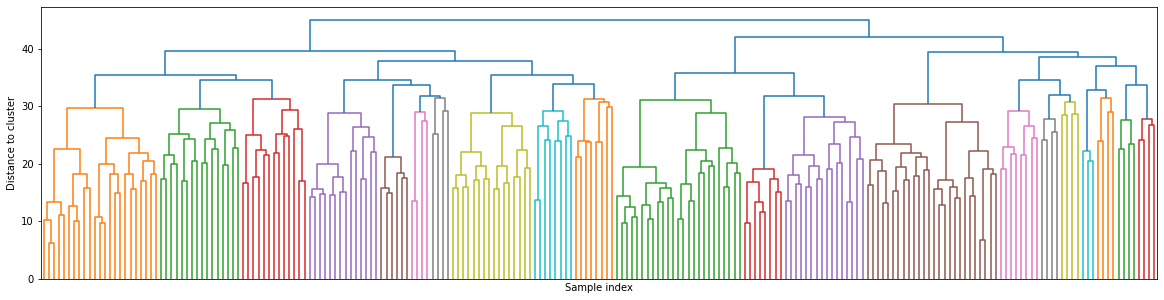

In [88]:
linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('Sample index')
plt.ylabel('Distance to cluster')

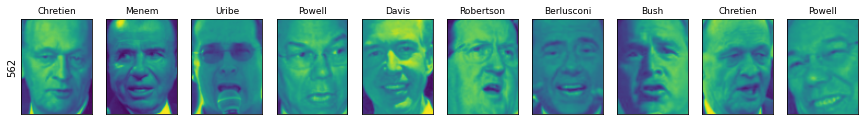

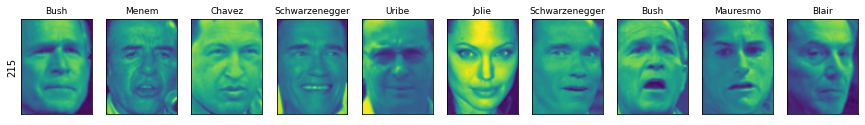

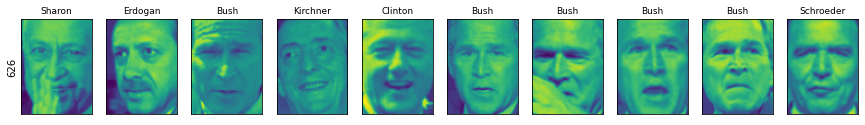

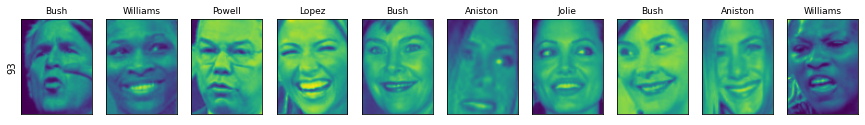

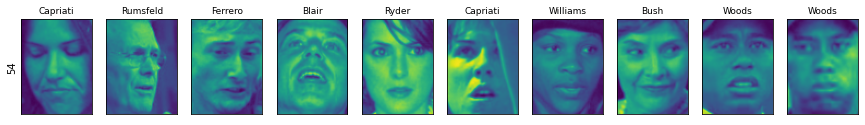

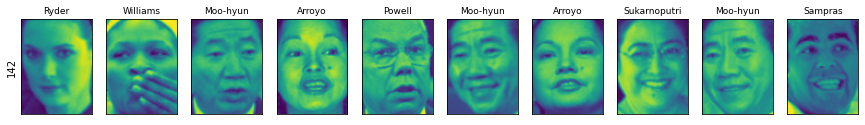

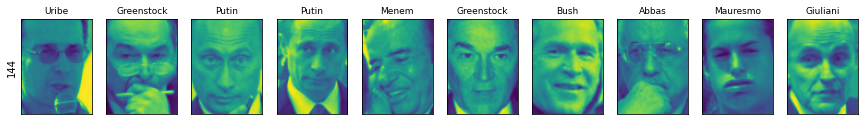

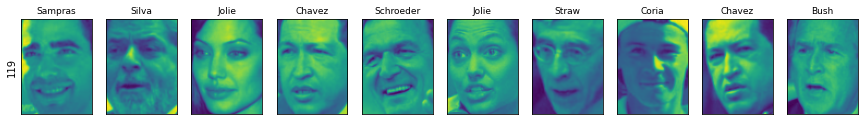

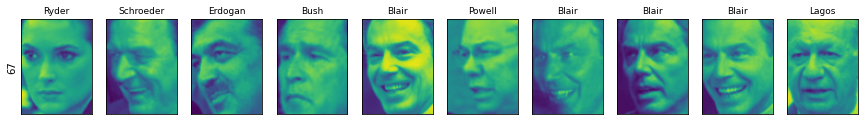

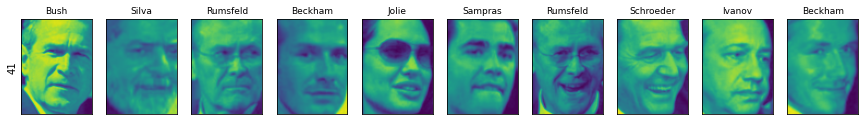

In [89]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

Cluster sizes for agglomerative grouping:
[ 22 245 138 110  46 127  99  43 136  14  35  34   6  33  33 225  14  22
  16  22  22  36   5  31  75  26  45  77  32  21  10  74  68  14  30  11
  19   2  36   9]


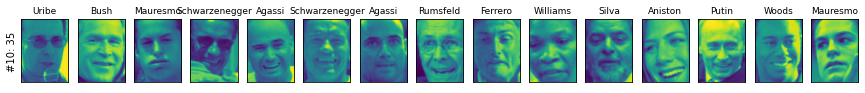

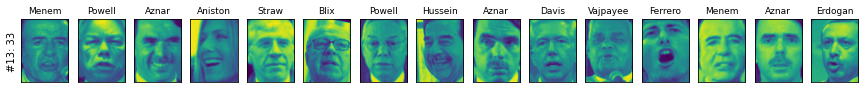

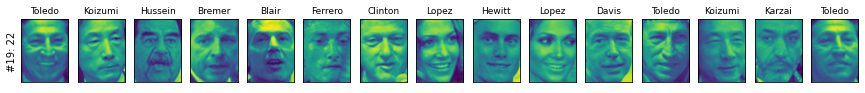

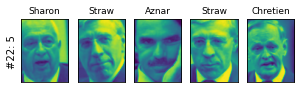

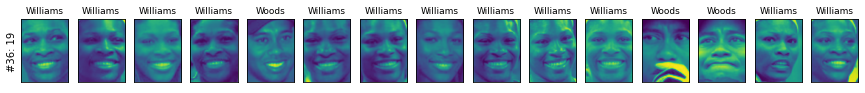

In [92]:
n_clusters = 40
agglo = AgglomerativeClustering(n_clusters)
labels_agg = agglo.fit_predict(X_pca)
print(f'Cluster sizes for agglomerative grouping:\n{np.bincount(labels_agg)}')
for cluster in [10, 13, 19, 22, 36]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel(f'#{cluster}: {cluster_size}')
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)